# Módulo 24 - Combinação de Modelos II

## Exercício 2

Luciana Gonzaga

---

# Gradient Boosting Machine (GBM)

---

### 1) Diferenças entre AdaBoost e GBM:

São dois algoritmos populares de aprendizado de máquina que pertencem à categoria de boosting. Eles têm semelhanças, mas também apresentam diferenças significativas. Aqui estão as principais diferenças entre eles:

1. **Abordagem de ajuste:**

    - O AdaBoost ajusta os pesos das amostras em cada iteração, dando mais peso às amostras mal classificadas para que o próximo modelo se concentre nelas.
    - O GBM ajusta os modelos sequencialmente, com cada modelo corrigindo o erro residual deixado pelo modelo anterior. Isso é feito através do gradiente descendente.


2. **Modelo base:**

    - O AdaBoost utiliza um modelo base fraco, geralmente uma árvore de decisão com profundidade máxima 1 (stump), mas pode ser qualquer outro modelo fraco.
    - O GBM utiliza árvores de decisão como seu modelo base, mas são árvores profundas que podem ser ajustadas e são construídas sequencialmente para minimizar o erro residual.


3. **Número de estimadores:**

    - O número de estimadores (modelos base) no AdaBoost é um hiperparâmetro importante. Geralmente, um número maior de estimadores é necessário para obter um melhor desempenho.
    - O número de estimadores no GBM também é importante, mas geralmente um número menor de árvores (estimadores) é necessário para obter um bom desempenho em comparação com o AdaBoost.


4. **Treinamento:**

    - O AdaBoost é um método de boosting mais rápido em termos de treinamento, pois os modelos base são mais simples (estumps) e cada iteração é rápida.
    - O treinamento do GBM é mais lento, pois envolve a construção de árvores mais profundas e o ajuste de cada modelo sequencialmente, o que pode ser computacionalmente intensivo.


5. **Sensibilidade a outliers:**

    - O AdaBoost é mais sensível a outliers, pois atribui mais peso a amostras mal classificadas, o que pode tornar os outliers problemáticos.
    - O GBM é menos sensível a outliers devido à natureza do gradiente descendente. No entanto, outliers extremos ainda podem afetar o desempenho.

---

### 2) Exemplo de uso:

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split

#### *GBM de classificação:*

In [2]:
X, y = make_hastie_10_2(random_state=0)
X_train, X_test = X[:2000], X[2000:]
y_train, y_test = y[:2000], y[2000:]

clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
    max_depth=1, random_state=0).fit(X_train, y_train)
clf.score(X_test, y_test)

0.913

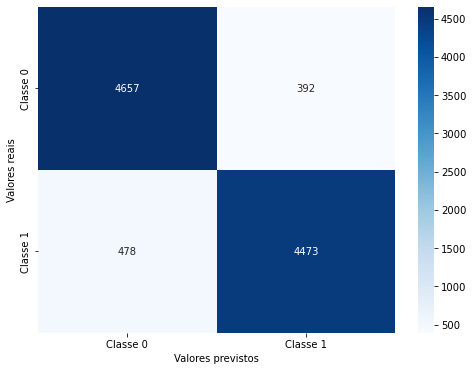

In [9]:
# Matriz de confusão:

y_pred = clf.predict(X_test)

confusion_mat = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['Classe 0', 'Classe 1'], yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Valores previstos')
plt.ylabel('Valores reais')
plt.show()

#### *GBM de regressão:*

In [11]:
X, y = make_regression(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=0)
reg = GradientBoostingRegressor(random_state=0)
reg.fit(X_train, y_train)
reg.predict(X_test[1:2])
reg.score(X_test, y_test)

0.43848663277068134

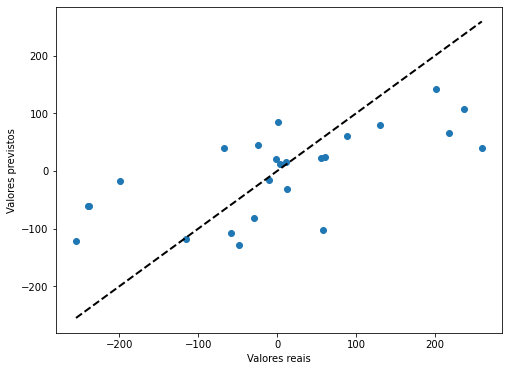

In [12]:
y_pred = reg.predict(X_test)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Valores reais')
plt.ylabel('Valores previstos')
plt.show()

---

### 3) Hiperparâmetros:

Aqui estão cinco hiperparâmetros importantes no GMB:

- **n_estimators:** Este hiperparâmetro determina o número de árvores (estimadores) a serem construídas no processo de boosting. Um valor maior geralmente melhora o desempenho do modelo, mas pode aumentar o tempo de treinamento e o risco de overfitting.


- **learning_rate:** O learning_rate controla a contribuição de cada árvore no modelo final. Um valor menor faz com que as árvores contribuam menos, o que pode ajudar a regularizar o modelo. No entanto, um valor muito baixo pode exigir um aumento correspondente em n_estimators.


- **max_depth:** O max_depth determina a profundidade máxima das árvores de decisão usadas como modelos base no GBM. Reduzir a profundidade pode ajudar a prevenir o overfitting, mas muito pouca profundidade pode resultar em subajuste (underfitting).


- **subsample:** O hiperparâmetro subsample controla a fração de amostras que são usadas para ajustar cada árvore. Um valor menor pode ajudar a reduzir a variância do modelo, mas também pode resultar em um modelo mais fraco.


- **loss:** O loss especifica a função de perda a ser otimizada durante o treinamento do GBM. Opções comuns incluem "ls" para regressão (Least Squares) e "deviance" para classificação (Cross-Entropy). A escolha da função de perda depende do tipo de problema que está sendo resolvido.


Além desses hiperparâmetros, o GBM possui outros hiperparâmetros relacionados à construção das árvores, à regularização e ao processo de boosting.

---

### 4) GridSearch:

In [14]:
from sklearn.model_selection import GridSearchCV

In [16]:
X, y = make_hastie_10_2(random_state=0)
X_train, X_test = X[:2000], X[2000:]
y_train, y_test = y[:2000], y[2000:]

gb = GradientBoostingClassifier()

parametros = {
    'learning_rate': [0.01, 0.05, 0.1],
    'min_samples_leaf': [6, 7, 8],
    'n_estimators': [50, 100, 200]
}

grid = GridSearchCV(estimator=gb,
                    param_grid=parametros,
                    scoring='roc_auc',
                    verbose=False,
                    cv=2)

grid.fit(X_train, y_train.ravel())

GridSearchCV(cv=2, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'min_samples_leaf': [6, 7, 8],
                         'n_estimators': [50, 100, 200]},
             scoring='roc_auc', verbose=False)

In [17]:
grid.best_params_

{'learning_rate': 0.1, 'min_samples_leaf': 8, 'n_estimators': 200}

In [23]:
best_ab = GradientBoostingClassifier(learning_rate= 0.05, min_samples_leaf= 8, n_estimators=300)
scores = cross_val_score(best_ab, X_test, y_test, cv=5)
scores.mean()

0.9231999999999999

### 5) Stochastic Gradient Boosting (Stochastic GBM)

É uma variante do GBM que introduz aleatoriedade no processo de construção das árvores de decisão. Jerome Friedman, o criador do Gradient Boosting, desenvolveu o Stochastic Gradient Boosting como uma extensão do GBM.

A maior diferença entre o GBM tradicional e o Stochastic GBM é a introdução de estocasticidade ou aleatoriedade. No GBM tradicional, as árvores de decisão são construídas usando todo o conjunto de dados de treinamento em cada iteração. No entanto, no Stochastic GBM, apenas uma amostra aleatória (ou um subconjunto) do conjunto de treinamento é usado para construir as árvores em cada iteração.

Essa aleatoriedade no processo de construção das árvores tem várias implicações:

- Eficiência Computacional: O Stochastic GBM pode ser mais eficiente do que o GBM tradicional, uma vez que o uso de subamostras menores reduz o tempo de treinamento.


- Regularização: A aleatoriedade introduz uma forma de regularização, tornando o modelo menos propenso a overfitting. Isso é especialmente útil quando o conjunto de dados de treinamento é grande.


- Robustez: A introdução de aleatoriedade ajuda a reduzir a sensibilidade do modelo a outliers e variações nos dados.


- Paralelização: O Stochastic GBM é mais adequado para paralelização, o que facilita o treinamento em hardware paralelo.

No entanto, a escolha entre o GBM tradicional e o Stochastic GBM depende do conjunto de dados e dos objetivos do problema. O GBM tradicional é mais determinístico e pode ser mais apropriado quando se deseja aproveitar todo o conjunto de dados de treinamento em cada iteração. O Stochastic GBM é uma alternativa útil, especialmente quando lidar com conjuntos de dados grandes e complexos. Em última análise, a decisão deve ser baseada na análise do conjunto de dados e na necessidade de regularização, eficiência e robustez.